# Modeling the Gravitational Slingshot Effect
### Sam Cochran, Jacob Murri Caleb Wilson

It should be noted that a lot of our work is best understood through animations, which can't be embedded into this PDF report. Below is a link to our github, where you can find supplementary code and animation files to look at as needed.

Code is here:
https://github.com/samcochran/Gravitational-Slingshot

Animations are here:
https://samcochran.github.io/Gravitational-Slingshot/

In [1]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style, rcParams
import matplotlib.animation as animation
#might want 3D stuff later
#from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

#Import in-house code
from simulation import *
from plotting import *

style.use('seaborn')
rcParams['figure.figsize'] = 10, 10


In our project we are attempting to model the physics of the slingshot effect, whereby a satellite can swing around a planet and receive a boost in speed so that it can successfully reach its destination. To begin to model this, we first consider Newton's laws applied to $n$ bodies. Let $\mathbf{x}_1(t), \mathbf{x}_2(t), \ldots, \mathbf{x}_n(t) \in \mathbb{R}^3$ be the positions of these $n$ bodies, which have masses $m_1, m_2, \ldots, m_n \geq 0$. Then if $G$ is the universal gravitational constant, the equations of motion given by Newton's Second Law are
$$ 
\mathbf{x}_i''(t) = \sum_{j=1, j\neq i}^n \frac{G m_j (\mathbf{x}_j(t) - \mathbf{x}_i(t))}{\|\mathbf{x}_j(t) - \mathbf{x}_i(t)\|^3}, \qquad 1 \leq i \leq n
$$
Now we can introduce dimensionless time, space, and mass parameters to make our system more tractable. Let $L$, $\Theta$, and $M$ be characteristic length, time, and mass scales, with units of meters, seconds, and kilograms, respectively. Then introduce the dimensionless parameters $\mathbf{u}_i = \mathbf{x}_i/L$, $\tau = t/\Theta$, and $\mu_i = m_i/M$. Then we can rewrite the equations as 
$$ 
\frac{L}{\Theta^2}\mathbf{u}_i''(\tau) = \sum_{j=1, j \neq i}^n \frac{G  M \mu_j L (\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau))}{L^3\|\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau)\|^3}, \qquad  \qquad 1 \leq i \leq n,
$$
which we can simplify to
$$ 
\mathbf{u}_i''(\tau) = \frac{GM \Theta^2}{L^3} \sum_{j=1, j \neq i}^n \frac{\mu_j (\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau))}{\|\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau)\|^3}, \qquad  \qquad 1 \leq i \leq n.
$$
Then by choosing our mass, length, and time scales accordingly, we can set $GM\Theta^2/L^3 = 1$, so that our equations have the dimensionless form
$$ 
\mathbf{u}_i''(\tau) = \sum_{j=1, j \neq i}^n \frac{\mu_j (\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau))}{\|\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau)\|^3}, \qquad  \qquad 1 \leq i \leq n.
$$
By scaling our potential and kinetic energies using the dimensionless form of the energy, $\varepsilon = E \cdot L/(G M^2) = E \cdot \Theta^2/(M L^2)$, we have that
$$
\varepsilon_K = \frac{1}{2}\sum_{i=1}^n \mu_i \|\mathbf{v}_i(\tau)\|^2, \qquad \varepsilon_P = -\frac{1}{2}\sum_{i=1}^n \sum_{j \neq i} \frac{\mu_i \mu_j}{\|\mathbf{u}_i - \mathbf{u}_j\|}.
$$
To make the equations easier to integrate numerically, we can make our system first order by setting $\mathbf{v}_i(\tau) = \mathbf{u}_i'(\tau)$. Then we have the equations
$$ 
\mathbf{u}_i'(\tau) = \mathbf{v}_i(\tau)
; \qquad \mathbf{v}_i'(\tau) = \sum_{j=1, j \neq i}^n \frac{\mu_j (\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau))}{\|\mathbf{u}_j(\tau) - \mathbf{u}_i(\tau)\|^3}, \qquad  \qquad 1 \leq i \leq n.
$$

Now we create some figures to model the dynamics of our system.  We will use a toy problem to do this initial visualization, i.e. assume both primary masses are of mass 1.

In each of these cases, there is something wrong with the outcome.  The plots below, more than anything, illustrate the difficulty of choosing initial conditions that allow for a successful slingshot maneuver.  Our task moving forward is to find a way to choose good initial conditions that allow for successful slingshot maneuvers.

I've gone ahead and hidden the inputs for all but the first plot, as they are essentially identical.  We now have these plots in 3D, which we think is pretty neat.

TypeError: object of type 'numpy.float64' has no len()

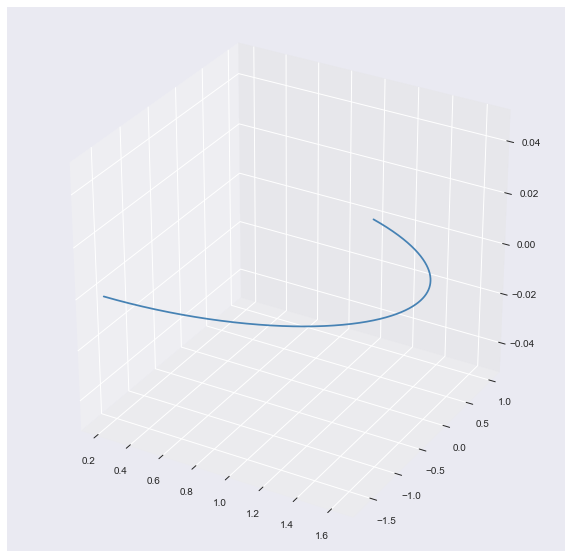

In [2]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .3, -.3, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

plot_sol3d(sol, 'Messy Trajectory, Near Collision', lim=(-2, 2))

# animate_solution(sol, 'Messy Trajectory, Near Collision', 'messy', skip=40)


In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .3, -.6, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

#BTW I don't think its non-differentiable I think it just looks like that from this scale, but I could be wrong
title = 'Non-Differentiable Trajectory \n(third body comes to a stop and changes direction)'
plot_sol3d(sol, title, lim=(-2, 2))

# animate_solution(sol, title, 'jagged', skip=40)


In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .01, -.01, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

title = 'Close Failure (slingshots, but curves back in)'
plot_sol3d(sol, title, lim=(-2, 2))

# animate_solution(sol, title, 'close', skip=40)


In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 0, -.7, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

title = 'Tron Lightbike Maneuver (purple cuts off green)'
plot_sol3d(sol, title, lim=(-2, 2))

# animate_solution(sol, title, 'tron', skip=40)


In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 1
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2, 1, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

plot_sol3d(sol, 'Early Slingshot Attempt', lim=(-2, 2))

# animate_solution(sol, 'Best Slingshot Attempt', 'best_attempt', skip=40)


In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 1.75
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, -.1, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2.5, 1.25, .1]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

plot_sol3d(sol, 'Slingshot Escape', lim=(-2, 2))

# animate_solution(sol, 'Slingshot Escape', 'escape', skip=40)


This is the closest we could get to a successful slingshot maneuver on this first attempt.  We came by this mostly by trial and error.  Though we have a long way to go, we note that the third body does indeed gain velocity and change direction by passing very close to the first body, so this is a solid initial model and illustrates our goal.

We further note that this is a very simple toy problem, with the first two primary bodies having mass of unity and the third body being considered as massless, so the masses, velocities, and positions for this model are pretty much meaningless, and only give us information relative to this model.

Interestingly, we added a small z perturbation, and the trajectory was still a slingshot.

We now do a sort of grid search idea to really find an optimal slingshot trajectory.

In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 .25, .25, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2, .5, 0]) # Velocity 3 

# Solve the system for each grid point, sort of
perturb = np.zeros_like(init)
perturb[[15, 16]] = .05
fig, ax = plt.subplots()
for k in range(20):
    sol = solve_ivp(gravity_acceleration, (t0, tf), init + k*perturb, t_eval= np.linspace(t0, tf, 10000)).y
    plot_solution(sol, 'Clean Slingshot Options', ax = ax, show_speed=False)
    ax.legend([])


As we can see, with these higher starting velocities, the problem appears quite stable.  See the plot below however to note the chaotic behavior that appears with lower starting velocities.  If the velocity is not great enough, slight changes to initial conditions result in drastically different behavior, with some slingshotting down as we would like, and others looping around unpredictably.  This is perhaps something to keep in mind as we proceed, especially as we consider what realistic velocities for spacecraft are relative to the planetary bodies.  We might need the model to be more robust to lower velocities, depending on what the engineering constraints are for realistic spacecraft speeds.

An animation of this plot can be found on our github (link at the top).

In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 .25, .25, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .7, .3, 0]) # Velocity 3 

# Solve the system for each grid point, sort of
perturb = np.zeros_like(init)
perturb[[15, 16]] = .05
fig, ax = plt.subplots()
for k in range(10):
    sol = solve_ivp(gravity_acceleration, (t0, tf), init + k*perturb, t_eval= np.linspace(t0, tf, 10000)).y
    plot_solution(sol, 'Chaotic Trajectories after small Velocity Perturbations', ax = ax, show_speed=False)
    ax.legend([])


## Energy Calculation and Rotational Coordinates

We added code to compute the engergy of each body to verify that our mechanics is working properly.  We note that this is not the actual energy, but rather a scaled energy (we divide by the masses).  The formula we used to calculate energy is below:

$$ e_i = \frac{1}{2} \|\mathbf{v}_i(\tau)\|^2 - \sum_{j \neq i} \frac{\mu_j}{\|\mathbf{u}_i-\mathbf{u}_j\|}
$$

We also added code allowing us to plot the solution in rotational coordinates. 

According to [this](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-07-dynamics-fall-2009/lecture-notes/MIT16_07F09_Lec18.pdf), the solution ot the motion of the first and second bodies is the Kepler problem, where the two bodies move in circular orbits about their center of mass with a frequency

$$\Omega = \sqrt{\frac{G(M_1+M_2)}{R^3}}$$

where $R$ is the distance between them. We can convert the xyz positions, velocities, and accelerations into a rotational coordinate frame centered at the center of mass of the system and rotating with angular velocity $\Omega$. In this coordinate system $M_1$ and $M_2$ stay at rest (their velocities $v_1$ and $v_2$ are canceled out by rotating the coordinate system by subtracting $\Omega r_1$ and $\Omega r_2$.

In practice, we can use the change in the solution for the first body's movement to find how much to rotate the coordinates, construct a rotation matrix, and use the rotation matrix to modify the position of the third body. Supposing we have already found the position of the center of mass of the system and subtracted off its position so our coordinates are already centered around the origin, we can find the rotation $\theta$ of the first body over time (compared to its initial position) by using a 2-argument arctangent: $\theta(t_i) = \arctan{(y_1(t_i)-y_1(t_0), x_1(t_i)-x_1(t_0)}$ in numpy `np.arctan2(y,x)`. (Using 2 arguments allows us to determine the correct quandrant for $\theta$). Now we will set the first two bodies positions constant based on their initial positions and rotate the third body by $-\theta(t_i)$ for each time step. This can be accomplished nicely by matrix multiplying a rotational matrix based off $-\theta_i = -\theta(t_i)$ to the x,y position vector of the third body at each time step:

$$R(-\theta_i) = \begin{bmatrix}
\cos{\theta_i} & \sin{\theta_i} \\
-\sin{\theta_i} & \cos{\theta_i}
\end{bmatrix}
$$

Because we are rotating our coordinates around the origin, we can use the same rotation matrix to convert our velocities into rotating coordinate velocities. If the center of mass has a velocity, we must subtract off that velocity from every bodies' velocity before rotating.

Below is a plot with the energies, as well as a plot of the solution using rotating coordinates with respect to the first two bodies.

In [ ]:
# Set up initial conditions and parameters (Modified from "Best Attempt")
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, -0.2, # Position 3
                 0.35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2.5, 1.3, 0.2]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y
rot_sol, center = to_rotational(sol)
energies = massless_energy(sol, [1,1,0])

title = 'Slingshot escape (rotated)'
plot_sol3d(rot_sol, title)
plot_nbody3d(sol, "3-body Slingshot escape", energies=energies)


## Trying different masses

This is still a toy problem, but a slightly more realistic one.  Instead of equal masses set to 1, we have a large mass corresponding to the sun and a smaller mass corresponding to the planet to be used in the slingshot maneuver.

In [ ]:
# Set up initial conditions and parameters
t0 = 0
tf = 3
init = np.array([.1, 0, 0, # Position 1
                 -4, 0, 0, # Position 2
                 -1, -1, 0, # Position 3
                 0, 0, 0, # Velocity/Momentum 1
                 0, 1.6, 0, # Velocity/Momentum 2
                 -3.3, 1.8, 0]) # Velocity 3 

# Solve the system
fun = lambda t, x: gravity_acceleration(t, x, 10, .1)
sol = solve_ivp(fun, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

# Plot and animate
fig, ax = plt.subplots()
plot_solution(sol, 'Solar System Basic', ax=ax)
ax.set_xlim(-6, 1)
ax.set_ylim(-2, 6)
plt.show()

plt.ioff()
fig, ax = plt.subplots()
ax.set_xlim(-6, 1)
ax.set_ylim(-2, 6)
# animate_solution(sol, 'Solar System Basic', 'solar_system_basic', skip=40, show_quivers=False, ax=ax)
plt.close()


We were able to pull off a decent slingshot here, and we can likely furthur improve it in the future.  Though this is still a toy problem, with made up masses and initial conditions, it is much more realistic than the previous model.  We now have a large mass to represent the sun, and a smaller mass (but still very large relative to the "massless" spacecraft) to represent Jupiter, or any planet that we could attempt a slingshot with.

If you view the animation of this model, we see that the spacecraft does indeed gain significant velocity as it passes by the second body, indicating that our slingshot model is indeed working as desired.  We will continue to engineer it so that we can maximize the velocity gain.

### Next Steps

For the current iteration of our paper, the major improvements that we've made are:
    
- Plotting in 3D

- Computing Energies

- Modeling with more realistic mass ratios

- Animating our solutions so that they look awesome (animations here https://samcochran.github.io/Gravitational-Slingshot/)
    
Over the course of the next week:

Jacob will look at our energy function to make sure it is working properly--there is some strange, non-conservative behavior that we need to explain. 

Sam will create a fully realistic model using the correct mass ratios to model the solar system.  We will see how things change when we have the third mass zero versus when we have a small nonzero mass for the third body.  This will give us some indication of how robust our model is, and if it is structurally stable.

Caleb will play with a new system to model the "Mandalorian slingshot" using the mass ratios and bodies we imagion exist in a Star Wars solar system.

We will also try to find initial conditions that give us a specific angle for the trajectory of the third body.  We will also look at ways to allow our spacecraft to apply point thrusts to change its velocity, and see if we can get that to work.

For our next submission, we will clean up our notebook a little bit and decide which animations to keep, and which things to drop for our final submission.